### T-Tests
***

In [1]:
# Plots
import matplotlib.pyplot as plt

# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Statistics
import scipy.stats as ss

### Normal Distribution
***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac {x - \mu}{\sigma}\big)^2 }$

In [2]:
def normal_pdf(x, mu = 0.0, sigma = 1.0):
    # Answer: A*B
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    B = np.exp(-0.5 * ((x - mu) / sigma)**2)
    return A * B

**Standard Normal Distribution**

$ \mu = 0$ and $ \sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} \big(x - \mu\big)^2 }$

In [3]:
# Middle of the standard normaql pdf

normal_pdf(0.0)

0.3989422804014327

In [4]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line

normal_pdf(0.0, mu = 0.0, sigma = np.sqrt(0.2))

0.8920620580763857

In [5]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line

normal_pdf(0.0, mu = -2.0, sigma = np.sqrt(0.5))

0.010333492677046035

### Plots
***
![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

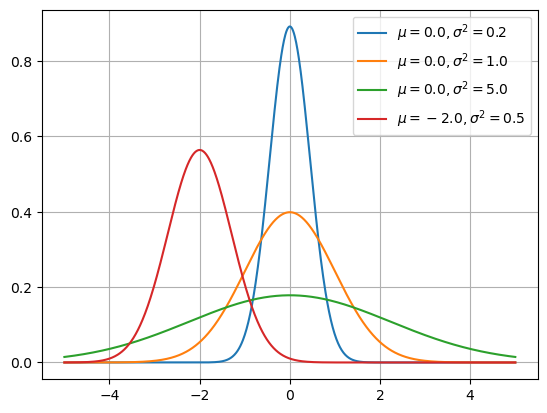

In [6]:
# Create a blank plot
fog, ax = plt.subplots()

# Range of x values
x = np.linspace(-5.0, 5.0, 1001)

# Plot various values for pdf
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
    y = normal_pdf(x, mu = mu, sigma = np.sqrt(sigma2))
    ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')
    # ax.plot(x, normal_pdf(x, mu = mu, sigma = np.sqrt(sigma2)))

# Add a legend
ax.legend()

# Add a grid
ax.grid()

# ax.plot(x, normal_pdf(x, mu = 0.0, sigma = np.sqrt(0.2)))
# ax.plot(x, normal_pdf(x, mu = 0.0, sigma = np.sqrt(1.0)))
# ax.plot(x, normal_pdf(x, mu = 0.0, sigma = np.sqrt(5.0)))
# ax.plot(x, normal_pdf(x, mu = -2.0, sigma = np.sqrt(0.5)))

### Area Under the Curve
***

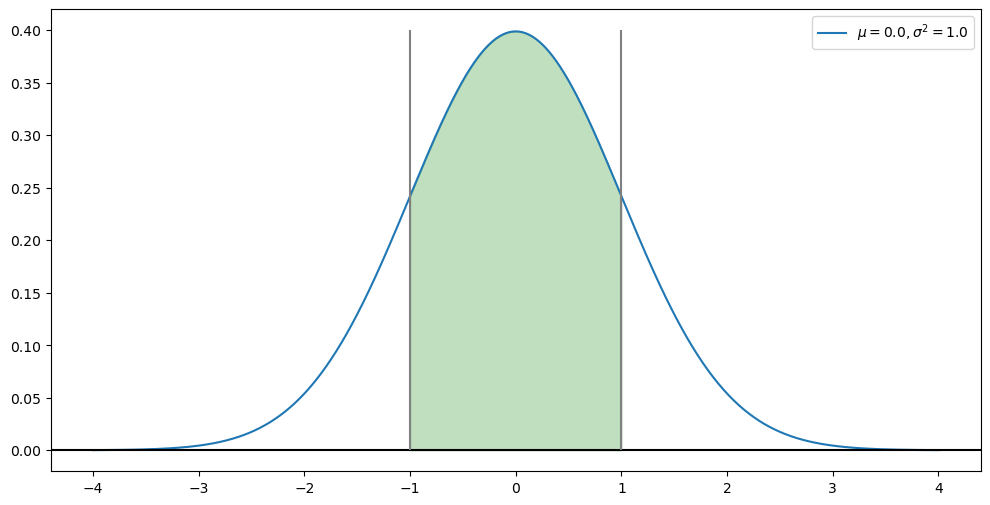

In [7]:
# Create a blank plot
fog, ax = plt.subplots(figsize = (12,6))

# Range of x values
x = np.linspace(-4.0, 4.0, 1001)

# Plot the pdf for the standard normal distribution
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu = mu, sigma = np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis
ax.axhline(0.0, color = 'black')

# Add vertical lines
ax.vlines([-1.0, 1.0], 0.0, 0.4, color = 'grey')

# x values between the vertical lines
x_interval = np.linspace(-1.0, 1.0, 101)

# Shade the area under the blue curve between the vertical lines
ax.fill_between(x_interval, normal_pdf(x_interval), color = 'green', alpha = 0.25)
   
# Add a legend
ax.legend();

In [8]:
# The intersection of the grey and blue lines
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'(1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
(1.0, 0.24197072451914337)


### Normal Data
***

In [9]:
# Generate some random normal data
random_data = np.random.standard_normal(100000)
#np.max(np.random.standard_normal(100000))

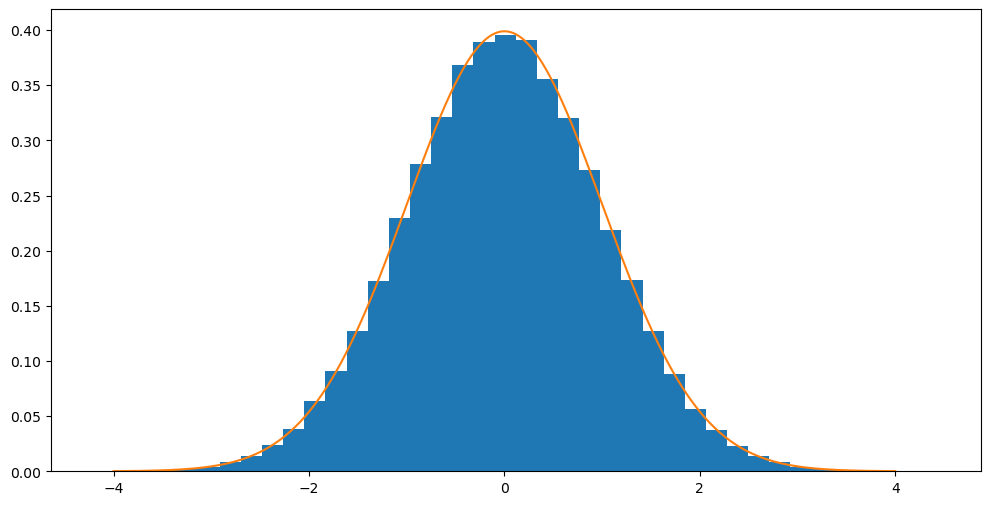

In [10]:
# Create an empty plot
fig, ax = plt.subplots(figsize = (12,6))

# Plot a histogram of the data
ax.hist(random_data, bins = 40, density = True)

# Plot the pdf for the standard normal distribution
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu = mu, sigma = np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');

### Sampling Distribution
***

In [11]:
# Generate some random normal data
random_data = np.random.standard_normal((10000, 25))

# Show
random_data

array([[ 1.10323826, -0.62429809,  1.49188102, ...,  0.60070801,
         0.78601495,  0.92431207],
       [ 0.91037735,  0.5463333 ,  1.69773816, ...,  0.42310847,
         0.02753709,  0.0053305 ],
       [-0.18113733, -0.67291956, -1.18825303, ..., -0.21002025,
        -1.14207379,  0.33026387],
       ...,
       [-1.34685886,  0.27740391, -0.02518618, ..., -0.22072615,
        -1.24121191,  0.8403882 ],
       [ 0.72976736,  0.53675721, -1.1222545 , ..., -0.08151935,
         1.1705604 , -0.17994483],
       [ 1.00858193, -0.75076524, -0.50584838, ..., -1.70415294,
         0.21294391,  1.40315165]])

In [12]:
# Mean accros the rows
random_data.mean(axis = 1)

array([ 0.08776121,  0.14243775, -0.3603287 , ..., -0.09669183,
       -0.11761225, -0.11729745])

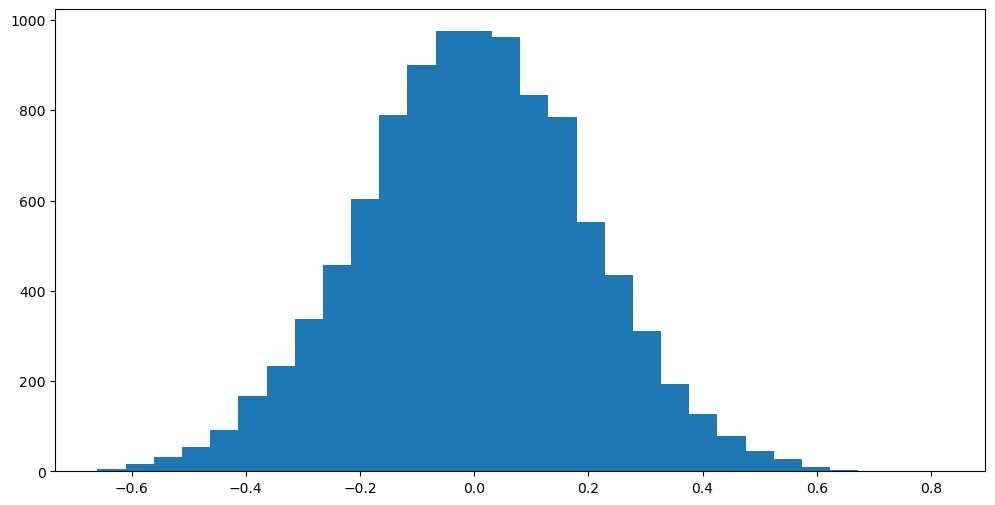

In [13]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis = 1), bins = 30);

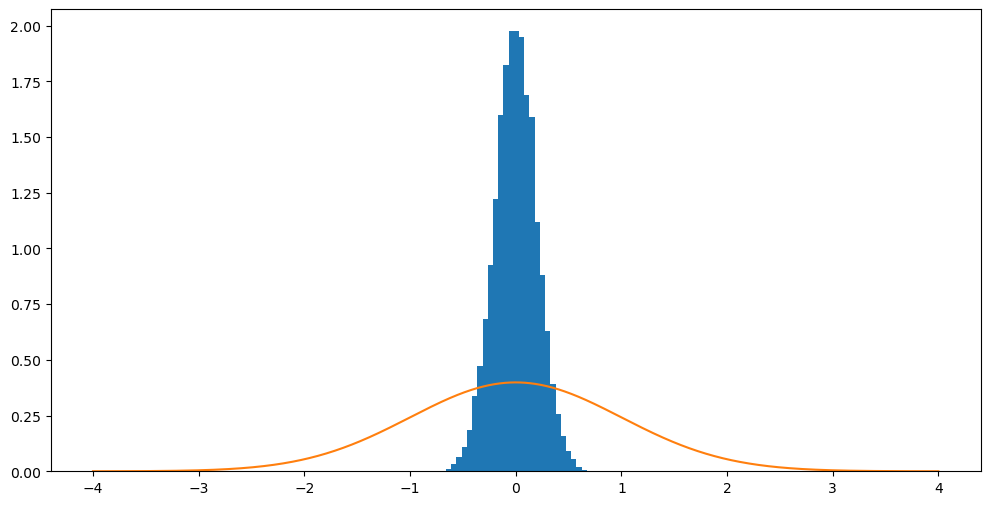

In [14]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis = 1), bins = 30, density = True)

# Plot standard normal distribution
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y);

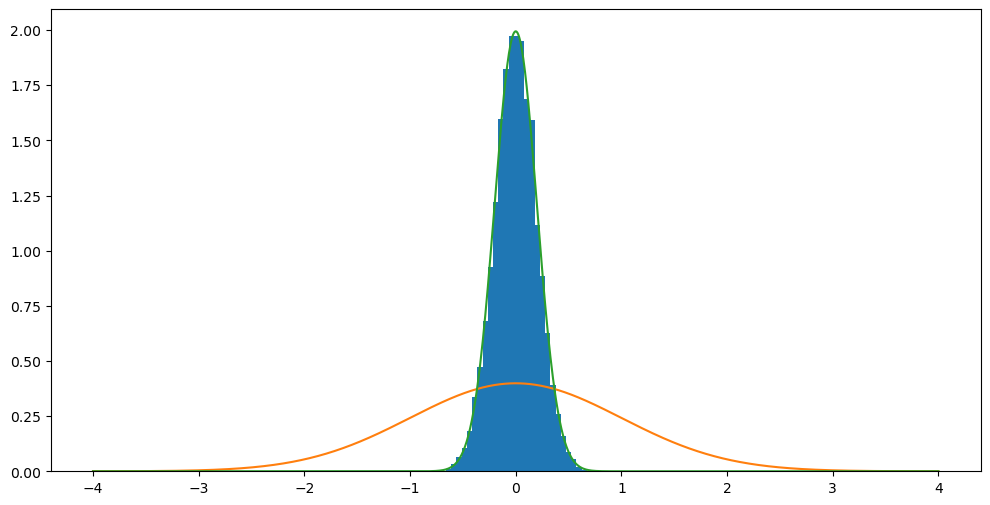

In [15]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis = 1), bins = 30, density = True)

# Plot standard normal distribution
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot standard normal distribution with mu = 0.0 and sigma = 0.2
y = normal_pdf(x, mu = 0.0, sigma = 0.2)
ax.plot(x, y);

### Random Normal
***

In [16]:
# Let-s pick a random mean value
random_mu = np.random.uniform(-3.0, 3.0)

In [17]:
# Generate some random normal data with this unknown mu
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show
random_data

array([[-1.24200597, -3.72943451, -2.25393545, ..., -2.55088123,
        -1.97951545, -4.19059879],
       [-4.0268408 , -3.36269764, -1.26384777, ..., -1.10725528,
        -2.64879606, -1.87776213],
       [-1.55516347, -3.2312226 , -0.75861807, ..., -1.33937187,
        -2.84225464, -0.74217856],
       ...,
       [-1.44321321, -1.02154917, -2.71425092, ..., -1.59979794,
        -3.06271087, -2.87748952],
       [-0.91700173, -1.61517915, -1.605052  , ..., -2.05045538,
        -2.62855852, -0.86507277],
       [-2.20655887, -4.00338444, -1.76326956, ..., -3.23835141,
        -2.00135754, -1.76820026]])

(array([0.01298566, 0.01298566, 0.03029986, 0.0714211 , 0.13851366,
        0.19911338, 0.34844842, 0.52808332, 0.70122539, 0.9695956 ,
        1.1405734 , 1.46954333, 1.83314168, 1.89590569, 1.95217686,
        2.02143369, 1.83530596, 1.65134251, 1.42192926, 1.00855257,
        0.80943919, 0.53024759, 0.39822676, 0.25971311, 0.17314207,
        0.10388524, 0.062764  , 0.03679269, 0.02164276, 0.00432855]),
 array([-3.01102851, -2.96482368, -2.91861885, -2.87241402, -2.82620919,
        -2.78000436, -2.73379953, -2.6875947 , -2.64138987, -2.59518504,
        -2.54898021, -2.50277537, -2.45657054, -2.41036571, -2.36416088,
        -2.31795605, -2.27175122, -2.22554639, -2.17934156, -2.13313673,
        -2.0869319 , -2.04072707, -1.99452224, -1.94831741, -1.90211258,
        -1.85590775, -1.80970292, -1.76349809, -1.71729326, -1.67108843,
        -1.6248836 ]),
 <BarContainer object of 30 artists>)

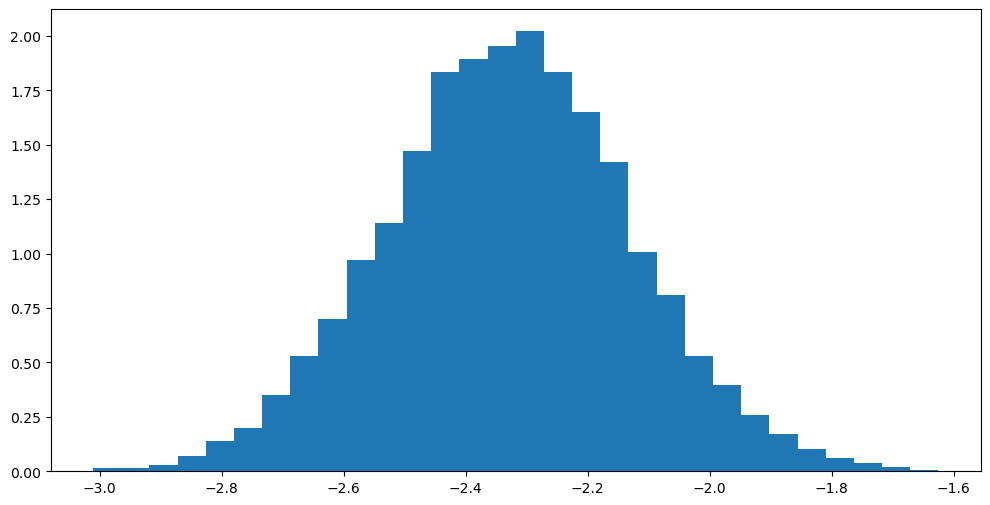

In [18]:
# Create an empty figure
fig, ax = plt.subplots(figsize = (12,6))

# Histogram of means
ax.hist(random_data.mean(axis = 1), bins = 30, density = True)

In [19]:
# Estimate random_mu from above histogram
# Now look at the value

random_mu

-2.3279790371154006

In [20]:
# A random sample of size 50
sample = np.random.normal(random_mu, 1.0, 50)

# Show
sample

array([-1.42062526, -2.96070436, -2.27085196, -2.43440396, -3.84659891,
       -0.99117544, -2.72725078, -0.80829694, -2.93637174, -3.02435085,
       -2.82644453, -1.94744969, -2.25284405, -3.66091521, -2.12255727,
       -3.91454177, -1.96476359, -4.3800196 , -4.67587188, -3.24075189,
       -2.67120945, -2.0370865 , -2.81546103, -1.35829127, -1.27403045,
       -3.29672436, -2.27763674, -2.00130857, -1.69374062, -4.35353488,
       -2.6372103 , -0.7598779 , -2.29773986, -0.49204817, -3.36371111,
       -1.96192327, -4.47435356, -2.98837839, -1.93428517, -3.9354655 ,
       -2.97564549, -1.29459078, -0.63111991, -2.55910741, -3.17159753,
       -1.48623342, -1.67947167, -3.57638427, -1.43749751, -0.96986432])

In [21]:
# Calculate the mean of the sample
sample.mean()

-2.4562463820946756

### Independent Sample t-test
***

In [22]:
# Load Iris
df = pd.read_csv('iris.csv')

# Show
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
# Setosa petal length
sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [24]:
# Virginica petal length
sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b




array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [25]:
# t-test

ss.ttest_ind(sample_a, sample_b)

TtestResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71, df=98.0)

***

### End